# Data Extraction

## Download the dataset

According to the Boston analysis website(https://data.boston.gov/), I found one of my interesting dataset, which named crime incident report(from 2015 to now). The download link is shown below: https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/crime_incident_reports.csv.

## Data Description

The crime report data set lists the events that Boston police responded to. Details include descriptions, where and when it happened, whether guns were involved, streets, reporting areas, etc. From this database, we can classify crimes according to the type, and find out which areas are the main places of shooting, robbery and other malignant crimes. 

# Data Cleanup

In [63]:
# The useful peamble
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#read csv file
crime = pd.read_csv("crime_incident_reports.csv") 
#select 5 lines
crime.head(n=5) 

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182100836,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D14,751,NaN,2018-12-14 21:00:00,2018,12,Friday,21,Part Three,LAKE SHORE CT,42.345991,-71.170290,"(42.34599110, -71.17028987)"
1,I182100829,613,Larceny,LARCENY SHOPLIFTING,C11,365,NaN,2018-12-14 20:29:00,2018,12,Friday,20,Part One,DORCHESTER AVE,42.290835,-71.062888,"(42.29083470, -71.06288798)"
2,I182100828,2629,Harassment,HARASSMENT,B2,312,NaN,2018-12-14 20:20:00,2018,12,Friday,20,Part Two,TOWNSEND ST,42.318126,-71.090256,"(42.31812574, -71.09025637)"
3,I182100827,562,Other Burglary,BURGLARY - OTHER - NO FORCE,E18,543,NaN,2018-12-14 20:43:00,2018,12,Friday,20,Part One,LINWOOD ST,42.256294,-71.127205,"(42.25629375, -71.12720457)"
4,I182100826,3410,Towed,TOWED MOTOR VEHICLE,D4,138,NaN,2018-12-14 19:09:00,2018,12,Friday,19,Part Three,FAIRFIELD ST,42.349493,-71.082086,"(42.34949297, -71.08208625)"


In [65]:
crime.rename(str.upper, axis='columns', inplace=True)
crime.sample(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LAT,LONG,LOCATION
141143,I172057584,1402,Vandalism,VANDALISM,C11,366,NaN,2017-07-16 16:24:00,2017,7,Sunday,16,Part Two,TEMPLETON WAY,42.290043,-71.057257,"(42.29004265, -71.05725661)"
204584,I162096155,802,Simple Assault,ASSAULT SIMPLE - BATTERY,B2,912,NaN,2016-11-24 16:49:00,2016,11,Thursday,16,Part Two,PARKER ST,42.324694,-71.100879,"(42.32469443, -71.10087902)"
27045,I182071075,3410,Towed,TOWED MOTOR VEHICLE,D4,,NaN,2018-09-04 11:48:00,2018,9,Tuesday,11,Part Three,BALL ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [66]:
crime.shape 

(347445, 17)

In [67]:
# Find the missing data in which column
crime.isnull().any()

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT                True
REPORTING_AREA         False
SHOOTING                True
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART                True
STREET                  True
LAT                     True
LONG                    True
LOCATION               False
dtype: bool

In [68]:
# Identify the number of missed data
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1905
REPORTING_AREA              0
SHOOTING               346032
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   98
STREET                  11258
LAT                     21748
LONG                    21748
LOCATION                    0
dtype: int64

In [69]:
crime['UCR_PART'].value_counts()

Part Three    172875
Part Two      106077
Part One       67030
Other           1365
Name: UCR_PART, dtype: int64

In [70]:
# process UCR_PART null data
null_urc = crime['UCR_PART'].isnull().sum()
counts = crime['UCR_PART'].value_counts()
counts_sum = counts.sum()
# wigths
limits = [int(i/counts_sum*null_urc) for i in counts[:-1]]
count_keys = list(counts.keys())
for i, j in zip(count_keys[:-1], limits):
    crime['UCR_PART'].fillna(i, limit=j, inplace=True)
crime['UCR_PART'].fillna(count_keys[-1], inplace=True)

crime['UCR_PART'].isnull().sum()

0

In [71]:
crime['SHOOTING'].value_counts()

Y    1413
Name: SHOOTING, dtype: int64

In [72]:
# process SHOOTING null data
crime['SHOOTING'].fillna('N', inplace=True)
crime['SHOOTING'].isnull().sum()

0

In [73]:
crime['DISTRICT'].value_counts()

B2     54565
C11    46212
D4     45798
A1     39186
B3     38466
C6     25899
D14    21881
E13    19255
E18    18890
A7     14181
E5     14163
A15     7044
Name: DISTRICT, dtype: int64

In [74]:
# process DISTRICT null data
null_dis = crime['DISTRICT'].isnull().sum()
counts = crime['DISTRICT'].value_counts()
counts_sum = counts.sum()
# wigths
limits = [int(i/counts_sum*null_dis) for i in counts[:-1]]
count_keys = list(counts.keys())
for i, j in zip(count_keys[:-1], limits):
    crime['DISTRICT'].fillna(i, limit=j, inplace=True)
crime['DISTRICT'].fillna(count_keys[-1], inplace=True)

crime['DISTRICT'].isnull().sum()

0

In [75]:
crime['STREET'].value_counts()[:10]

WASHINGTON ST        15533
BLUE HILL AVE         8469
BOYLSTON ST           7899
DORCHESTER AVE        5615
TREMONT ST            5239
MASSACHUSETTS AVE     5126
HARRISON AVE          5054
CENTRE ST             4787
COMMONWEALTH AVE      4556
HYDE PARK AVE         3785
Name: STREET, dtype: int64

In [76]:
# process STREET null data
null_dis = crime['STREET'].isnull().sum()
counts = crime['STREET'].value_counts()
counts_sum = counts.sum()
# wigths:  choose most 100
limits = [int(i/counts_sum*null_dis) for i in counts[:100]]
count_keys = list(counts.keys())
for i, j in zip(count_keys[:100], limits):
    crime['STREET'].fillna(i, limit=j, inplace=True)
crime['STREET'].fillna(count_keys[100], inplace=True)

crime['STREET'].value_counts()[:10]

WASHINGTON ST        16053
BLUE HILL AVE         8752
BOYLSTON ST           8163
METROPOLITAN AVE      6456
DORCHESTER AVE        5803
TREMONT ST            5414
MASSACHUSETTS AVE     5297
HARRISON AVE          5223
CENTRE ST             4947
COMMONWEALTH AVE      4708
Name: STREET, dtype: int64

In [77]:
# set(crime['REPORTING_AREA'])

In [78]:
# process REPORT_AREA null data
crime['REPORTING_AREA'] = crime['REPORTING_AREA'].apply(lambda x: np.NaN if x == ' ' else x)

null_dis = crime['REPORTING_AREA'].isnull().sum()
counts = crime['REPORTING_AREA'].value_counts()
counts_sum = counts.sum()
# wigths:  choose most 100
limits = [int(i/counts_sum*null_dis) for i in counts[:100]]
count_keys = list(counts.keys())
for i, j in zip(count_keys[:100], limits):
    crime['REPORTING_AREA'].fillna(i, limit=j, inplace=True)
crime['REPORTING_AREA'].fillna(count_keys[100], inplace=True)

crime['REPORTING_AREA'] = crime['REPORTING_AREA'].apply(lambda x: int(x))


In [79]:
# drop useless columns
crime.drop(columns=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'LAT', 'LONG', 'OCCURRED_ON_DATE'], inplace=True)

In [80]:
# most 10 crime group
crime_counts = crime['OFFENSE_CODE_GROUP'].value_counts()
crime_counts [:10]

Motor Vehicle Accident Response    40505
Larceny                            28411
Medical Assistance                 25789
Investigate Person                 20200
Other                              19606
Drug Violation                     18004
Simple Assault                     17278
Vandalism                          16655
Verbal Disputes                    14285
Towed                              12318
Name: OFFENSE_CODE_GROUP, dtype: int64

In [81]:
# shooting
shooting_crime = crime[crime['SHOOTING']=='Y']
shooting_crime[:5]

,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LOCATION
988,Homicide,B3,474,Y,2018,12,Monday,21,Part One,SAVANNAH AVE,"(42.27373936, -71.10108024)"
3339,Aggravated Assault,E13,906,Y,2018,12,Saturday,22,Part One,HEATH ST,"(42.32638832, -71.10181751)"
3613,Homicide,B3,455,Y,2018,11,Friday,19,Part One,NORWELL ST,"(42.30132851, -71.07870873)"
4595,Aggravated Assault,B2,299,Y,2018,11,Tuesday,14,Part One,HOMMAGEN CT,"(42.32547404, -71.08749972)"
5411,Aggravated Assault,E13,307,Y,2018,11,Saturday,1,Part One,WESTMINSTER AVE,"(42.31609763, -71.09524853)"


In [82]:
# larceny
larceny = crime['OFFENSE_CODE_GROUP'] == "Larceny" 
larceny_crime = crime[larceny]
larceny_crime[:5]

,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LOCATION
1,Larceny,C11,365,N,2018,12,Friday,20,Part One,DORCHESTER AVE,"(42.29083470, -71.06288798)"
5,Larceny,A1,105,N,2018,12,Friday,19,Part One,SUMMER ST,"(42.35521625, -71.06012863)"
22,Larceny,D4,170,N,2018,12,Friday,4,Part One,WASHINGTON ST,"(42.33675016, -71.07662788)"
27,Larceny,D4,143,N,2018,12,Friday,17,Part One,BOYLSTON ST,"(42.34862382, -71.08277637)"
33,Larceny,C6,200,N,2018,12,Friday,18,Part One,W BROADWAY,"(42.34234193, -71.05633276)"


In [83]:
crime.isnull().sum()

OFFENSE_CODE_GROUP    0
DISTRICT              0
REPORTING_AREA        0
SHOOTING              0
YEAR                  0
MONTH                 0
DAY_OF_WEEK           0
HOUR                  0
UCR_PART              0
STREET                0
LOCATION              0
dtype: int64

In [84]:
# new feature
crime['IS_LARCENY'] = crime['OFFENSE_CODE_GROUP'] == 'Larceny'

In [85]:
# data after process
crime.sample(5)

,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LOCATION,IS_LARCENY
14412,Motor Vehicle Accident Response,E13,624,N,2018,10,Friday,13,Part Three,CORNWALL ST,"(0.00000000, 0.00000000)",False
39152,Larceny,C11,355,N,2018,7,Monday,17,Part One,GIBSON ST,"(42.29755533, -71.05970910)",True
319424,Residential Burglary,C11,354,N,2015,9,Saturday,0,Part One,NEPONSET AVE,"(42.29711149, -71.05614405)",False
109726,Larceny From Motor Vehicle,C11,436,N,2017,10,Tuesday,8,Part One,WASHINGTON ST,"(42.28794860, -71.07117745)",False
221698,Larceny,B2,604,N,2016,9,Friday,13,Part One,DARLING ST,"(42.33178750, -71.10562690)",True


In [86]:
# district_dict = {j:i for i, j in enumerate(crime['DISTRICT'].unique())}
# shooting_dict = {j:i for i, j in enumerate(crime['SHOOTING'].unique())}
# year_dict = {j:i for i, j in enumerate(crime['YEAR'].unique())}
# month_dict = {j:i for i, j in enumerate(crime['MONTH'].unique())}
# hour_dict = {j:i for i, j in enumerate(crime['HOUR'].unique())}
# day_dict = {j:i for i, j in enumerate(crime['DAY_OF_WEEK'].unique())}
# ucr_dict = {j:i for i, j in enumerate(crime['UCR_PART'].unique())}

In [87]:
# crime['DISTRICT'] = [district_dict[i] for i in crime['DISTRICT']]
# crime['SHOOTING'] = [shooting_dict[i] for i in crime['SHOOTING']]
# crime['YEAR'] = [year_dict[i] for i in crime['YEAR']]
# crime['HOUR'] = [hour_dict[i] for i in crime['HOUR']]
# crime['MONTH'] = [month_dict[i] for i in crime['MONTH']]
# crime['DAY_OF_WEEK'] = [day_dict[i] for i in crime['DAY_OF_WEEK']]
# crime['UCR_PART'] = [ucr_dict[i] for i in crime['UCR_PART']]
# crime.sample(5)

In [88]:
# crime.isnull().sum()

# Data Visualization

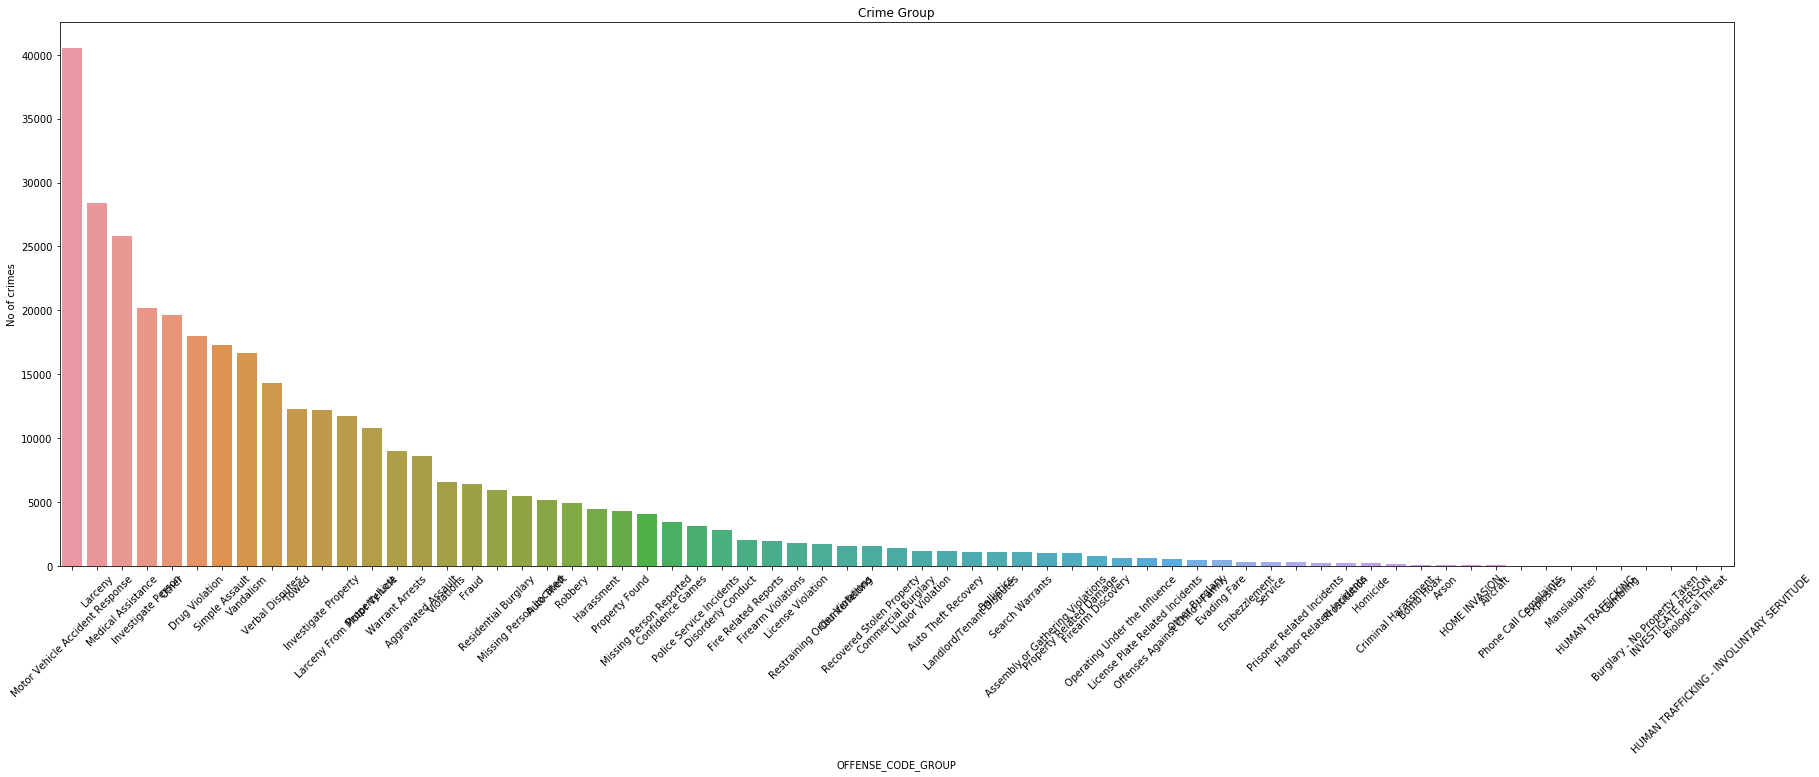

In [89]:
plt.figure(figsize = (30,10))

sns.countplot(x='OFFENSE_CODE_GROUP',data=crime,order=crime['OFFENSE_CODE_GROUP'].value_counts().index)
plt.title('Crime Group')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

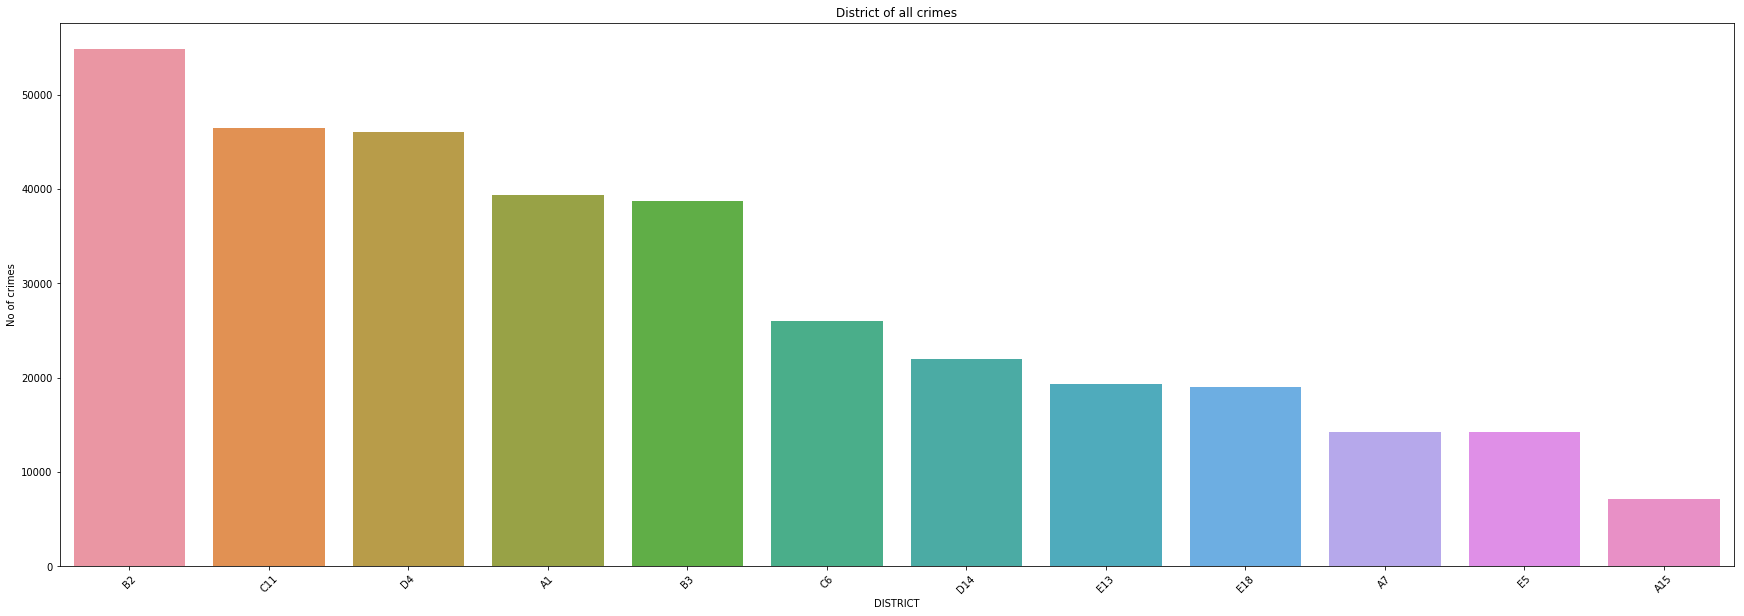

In [90]:
plt.figure(figsize = (30,10))

sns.countplot(x='DISTRICT',data=crime,order=crime['DISTRICT'].value_counts().index)
plt.title('District of all crimes')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

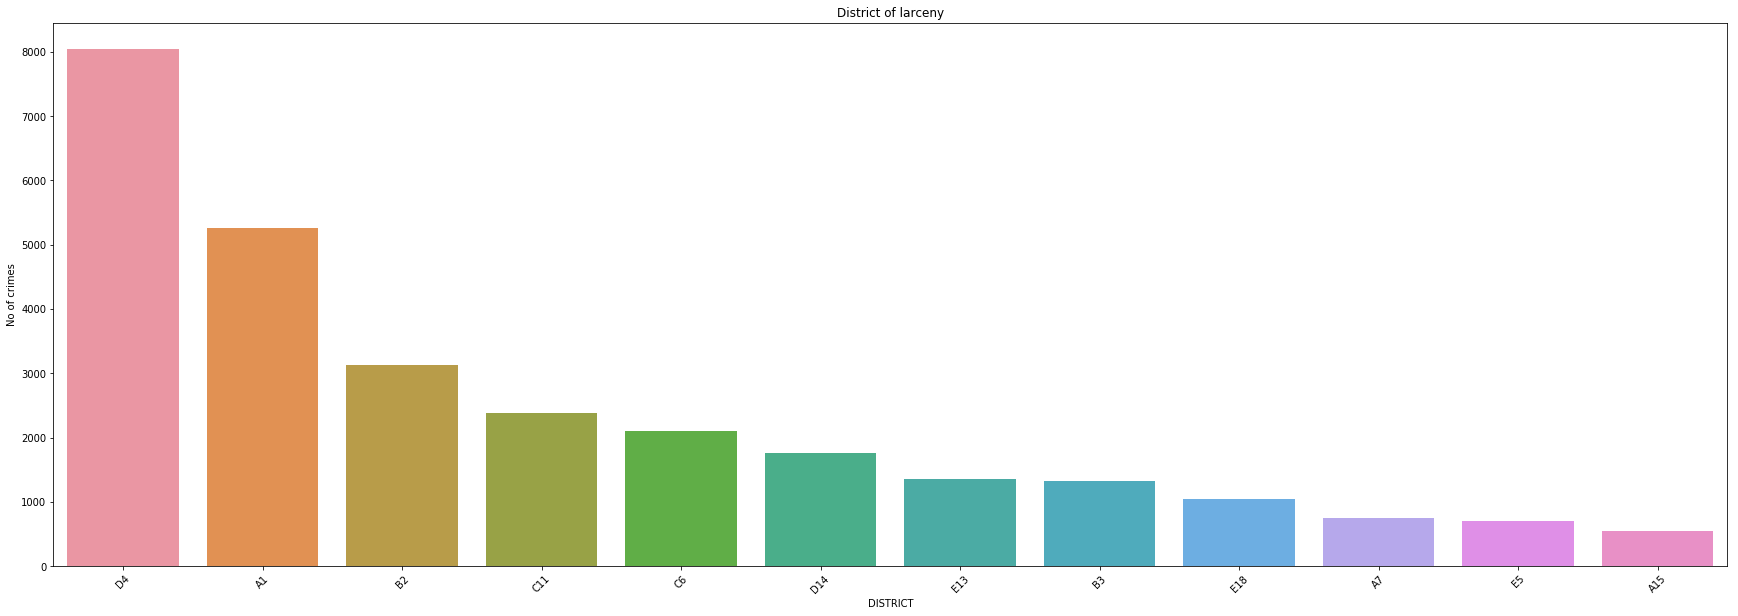

In [91]:
plt.figure(figsize = (30,10))

sns.countplot(x='DISTRICT',data=larceny_crime,order=larceny_crime['DISTRICT'].value_counts().index)
plt.title('District of larceny')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

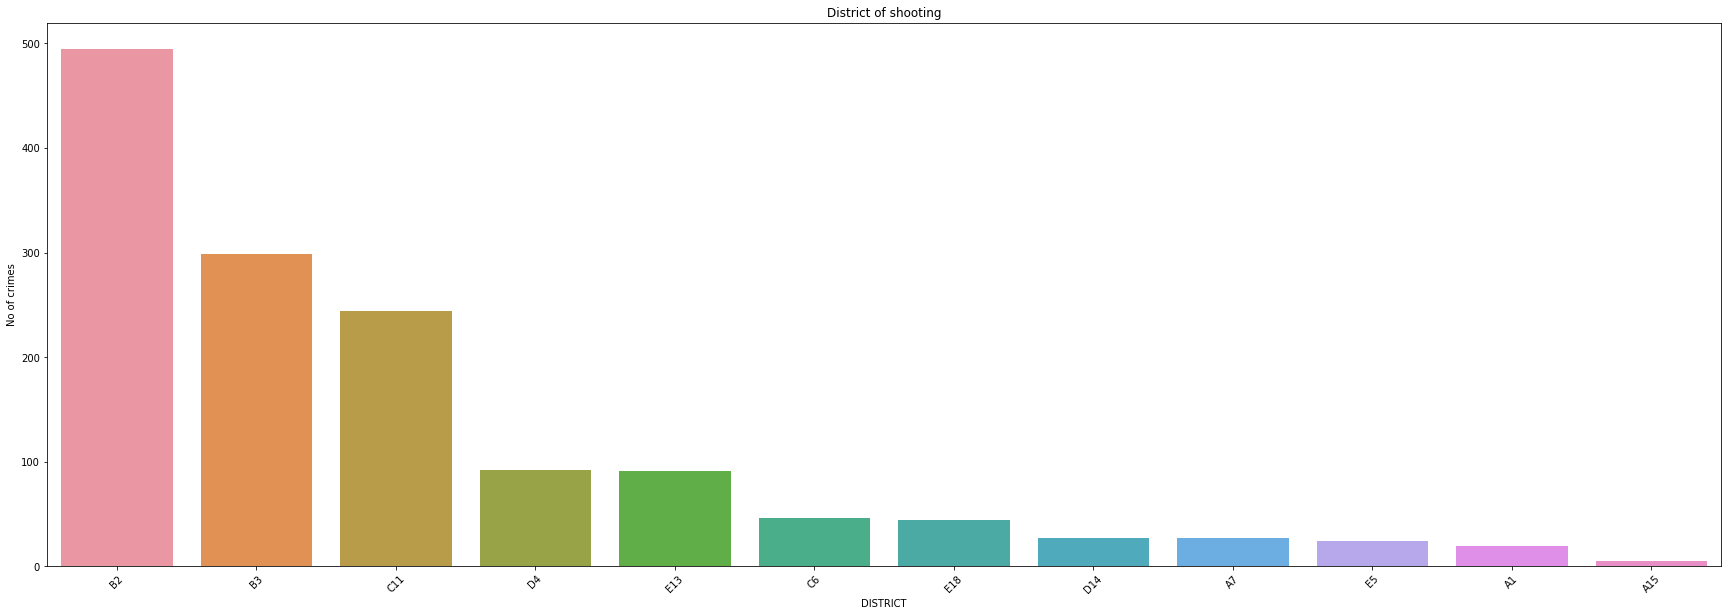

In [92]:
plt.figure(figsize = (30,10))

sns.countplot(x='DISTRICT',data=shooting_crime,order=shooting_crime['DISTRICT'].value_counts().index)
plt.title('District of shooting')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

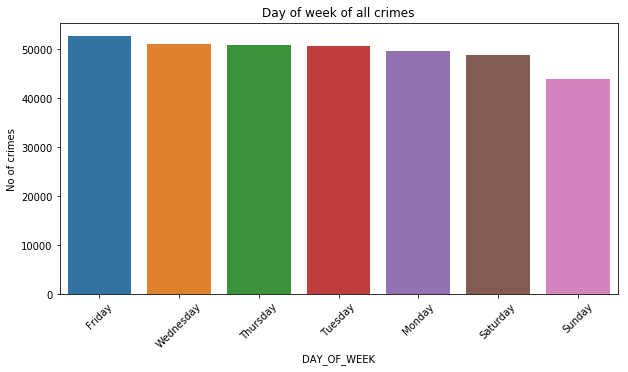

In [93]:
plt.figure(figsize = (10,5))

sns.countplot(x='DAY_OF_WEEK',data=crime,order=crime['DAY_OF_WEEK'].value_counts().index)
plt.title('Day of week of all crimes')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

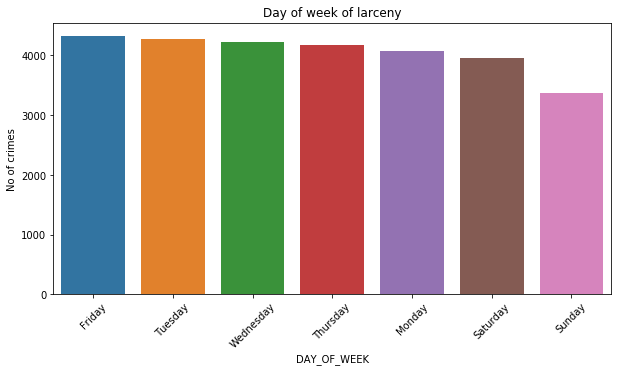

In [94]:
plt.figure(figsize = (10,5))

sns.countplot(x='DAY_OF_WEEK',data=larceny_crime,order=larceny_crime['DAY_OF_WEEK'].value_counts().index)
plt.title('Day of week of larceny')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

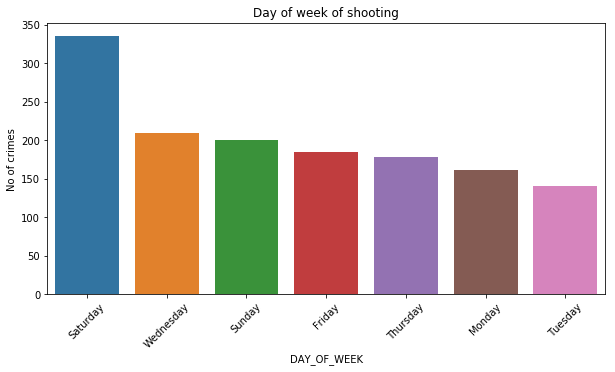

In [95]:
plt.figure(figsize = (10,5))

sns.countplot(x='DAY_OF_WEEK',data=shooting_crime,order=shooting_crime['DAY_OF_WEEK'].value_counts().index)
plt.title('Day of week of shooting')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

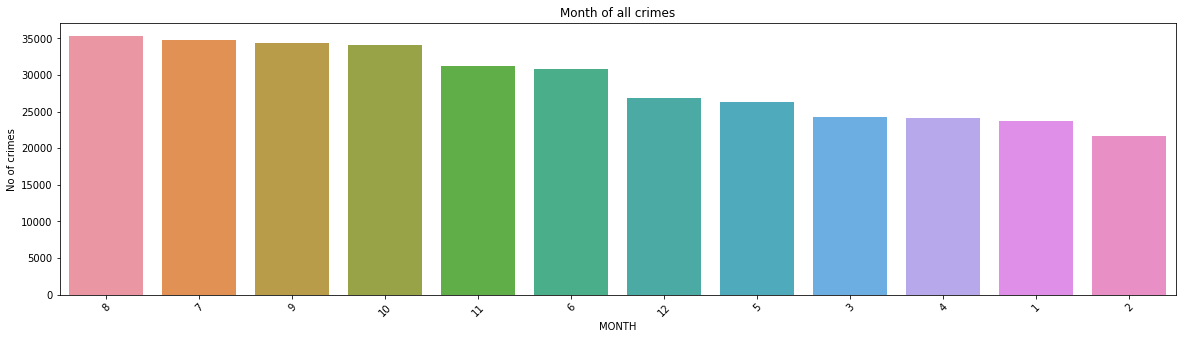

In [96]:
plt.figure(figsize = (20,5))

sns.countplot(x='MONTH',data=crime,order=crime['MONTH'].value_counts().index)
plt.title('Month of all crimes')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

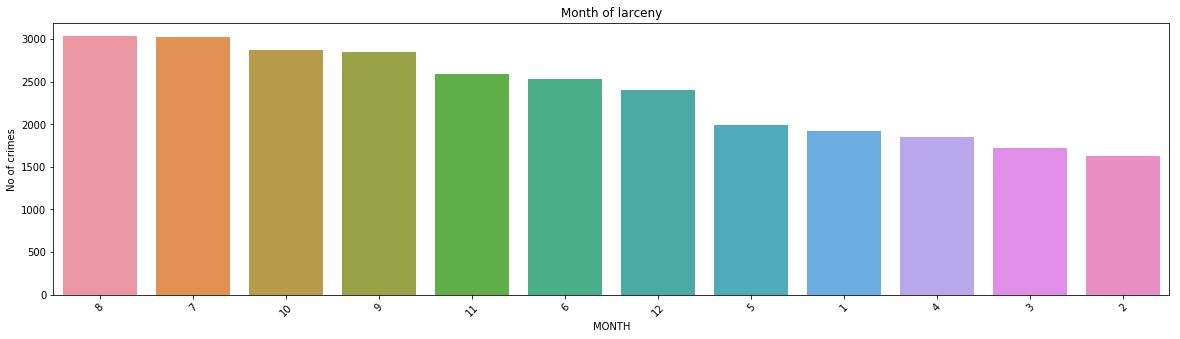

In [97]:
plt.figure(figsize = (20,5))

sns.countplot(x='MONTH',data=larceny_crime,order=larceny_crime['MONTH'].value_counts().index)
plt.title('Month of larceny')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

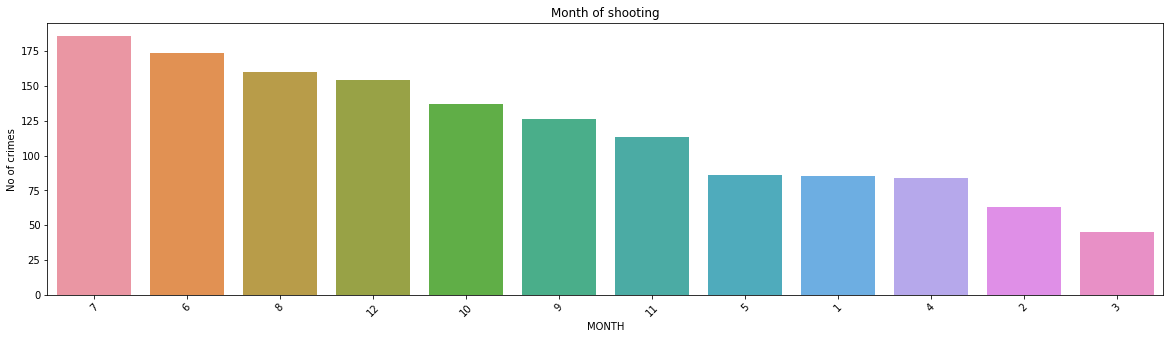

In [98]:
plt.figure(figsize = (20,5))

sns.countplot(x='MONTH',data=shooting_crime,order=shooting_crime['MONTH'].value_counts().index)
plt.title('Month of shooting')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

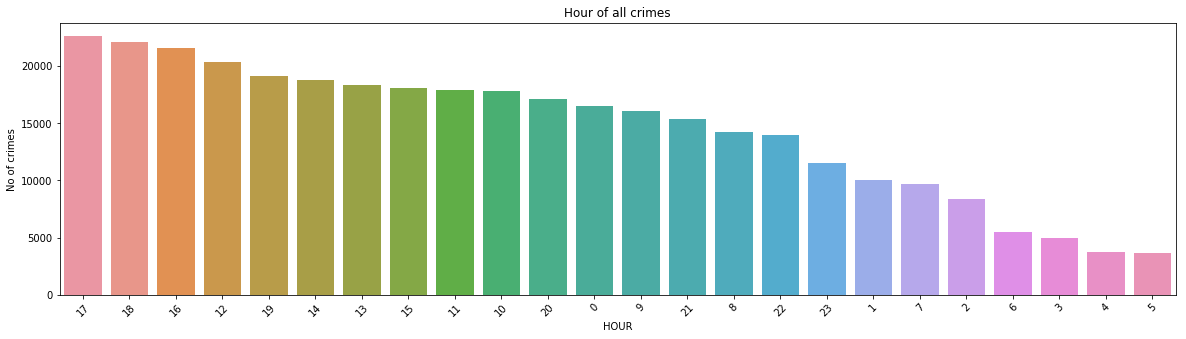

In [99]:
plt.figure(figsize = (20,5))

sns.countplot(x='HOUR',data=crime,order=crime['HOUR'].value_counts().index)
plt.title('Hour of all crimes')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

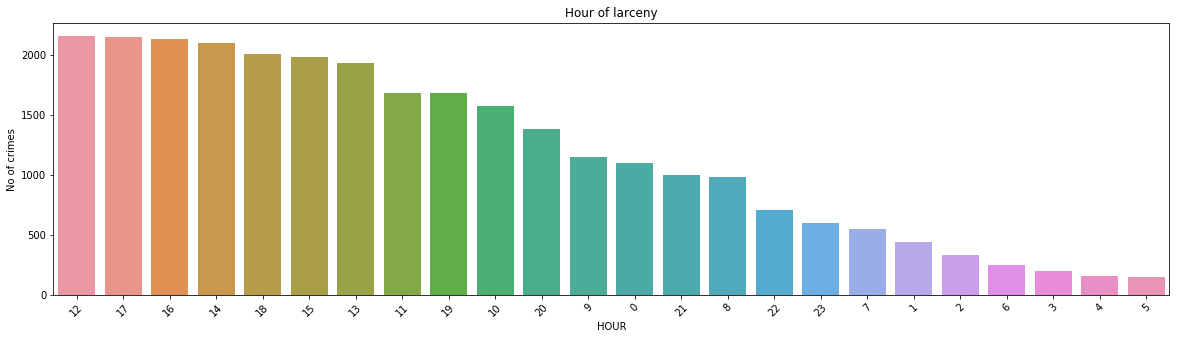

In [100]:
plt.figure(figsize = (20,5))

sns.countplot(x='HOUR',data=larceny_crime,order=larceny_crime['HOUR'].value_counts().index)
plt.title('Hour of larceny')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

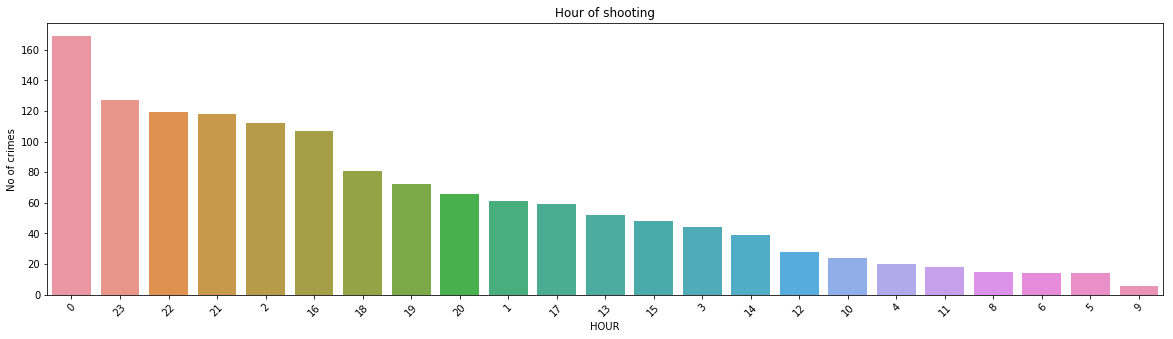

In [101]:
plt.figure(figsize = (20,5))

sns.countplot(x='HOUR',data=shooting_crime,order=shooting_crime['HOUR'].value_counts().index)
plt.title('Hour of shooting')
plt.xticks(rotation=45)
plt.ylabel('No of crimes')
plt.show()

# Descriptive/Predictive analytics

## Predictive model

In [102]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [103]:
# choose part of data, otherwise the mechine doesnt work.
crime_part = crime.sample(100000)
x = crime_part.drop(columns=['OFFENSE_CODE_GROUP', 'IS_LARCENY'])
y = crime_part['IS_LARCENY']
x.shape, y.shape

((100000, 10), (100000,))

In [104]:
crime_part.sample(5)

,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LOCATION,IS_LARCENY
278846,Motor Vehicle Accident Response,B2,326,N,2016,3,Tuesday,18,Part Three,QUINCY ST,"(42.31297722, -71.07499278)",False
174575,Motor Vehicle Accident Response,B2,320,N,2017,3,Saturday,18,Part Three,WARREN ST,"(42.31089170, -71.08322396)",False
84792,Warrant Arrests,A1,91,N,2018,2,Tuesday,15,Part Three,HANOVER ST,"(42.36339154, -71.05488123)",False
301904,Other,B2,612,N,2015,12,Tuesday,16,Part Two,FRANCIS ST,"(42.33606304, -71.10782832)",False
330213,Property Found,C11,355,N,2015,8,Tuesday,8,Part Three,GIBSON ST,"(42.29755533, -71.05970910)",False


In [105]:
# preprocess
columns_num = ['YEAR', 'MONTH', 'HOUR', 'REPORTING_AREA']
columns_str = ['DISTRICT', 'SHOOTING', 'UCR_PART', 'DAY_OF_WEEK']
ct = ColumnTransformer([
    ("num", OneHotEncoder(categories="auto"), columns_num),
    ("cat", OneHotEncoder(), columns_str),
])

In [106]:
X = ct.fit_transform(x).todense()

In [107]:
X.shape

(100000, 943)

In [108]:
def compute_accuracy(model, x, y):
    # cross validation to calculate training accuracy
    return cross_val_score(model, x, y, cv=5, scoring='accuracy', n_jobs=-1).mean()*100

def plot_accuracies(models, x, y):
    # plot accuricies of models
    names = models.keys()
    accuricies = []
    for name, model in models.items():
        scores = compute_accuracy(model, x, y)
        print(name, scores)
        accuricies.append(round(scores, 2))
    plt.xlabel('model name')
    plt.ylabel('accuracy /%')
    for a,b in zip(names, accuricies):  
        plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom',fontsize=11) 
    plt.bar(names, accuricies)
    plt.show()

dtc 92.63400448536501
rfc 93.23100638652002
nb 90.1989997304425
lr 94.0260043380875


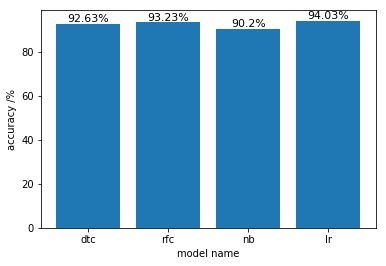

In [109]:
random_num = 42

lr = LogisticRegression(random_state=random_num)
dtc = DecisionTreeClassifier(random_state=random_num)
rfc = RandomForestClassifier(random_state=random_num)
nb = GaussianNB()

models = {
    'dtc': dtc,
    'rfc': rfc,
    'nb': nb,
    'lr': lr,
}

plot_accuracies(models, X, y)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_num)

C:\Users\zz\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [113]:
# rfc with default params
rfc = RandomForestClassifier(random_state=random_num)

rfc.fit(x_train, y_train)

# accuracy score
train_score = rfc.score(x_train, y_train)
test_score = rfc.score(x_test, y_test)
print('rfc train score: ', round(train_score, 4))
print('rfc test  score: ', round(test_score, 4))

C:\Users\zz\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfc train score:  0.9953
rfc test  score:  0.9329


In [114]:
# classification report
train_report = classification_report(y_train, rfc.predict(x_train))
test_report = classification_report(y_test, rfc.predict(x_test))
print("*"*10, 'rfc train classification report', '*'*10)
print()
print(train_report)
print()
print("*"*10, 'rfc test  classification report', '*'*10)
print()
print(test_report)

********** rfc train classification report **********

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     64241
        True       0.99      0.95      0.97      5759

   micro avg       1.00      1.00      1.00     70000
   macro avg       0.99      0.98      0.98     70000
weighted avg       1.00      1.00      1.00     70000


********** rfc test  classification report **********

              precision    recall  f1-score   support

       False       0.95      0.98      0.96     27556
        True       0.63      0.42      0.51      2444

   micro avg       0.93      0.93      0.93     30000
   macro avg       0.79      0.70      0.73     30000
weighted avg       0.92      0.93      0.93     30000



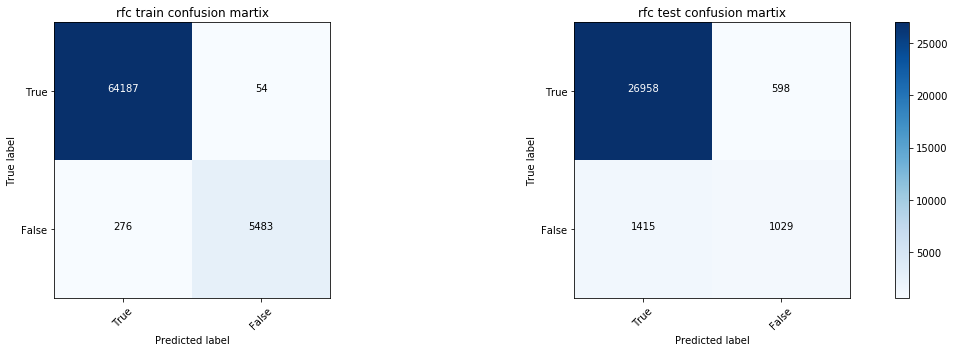

In [115]:
# confusion martix
plt.figure(figsize=(20, 5))
train_cm = confusion_matrix(y_train, rfc.predict(x_train))
test_cm = confusion_matrix(y_test, rfc.predict(x_test))

plt.subplot(1, 2, 1)
plot_confusion_matrix(train_cm, ["True", "False"], title="rfc train confusion martix")
plt.subplot(1, 2, 2)
plot_confusion_matrix(test_cm, ['True', 'False'], title="rfc test confusion martix")